<a href="https://colab.research.google.com/github/ctclumak/posts/blob/master/Cancer_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv("cancer_classification.csv")

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


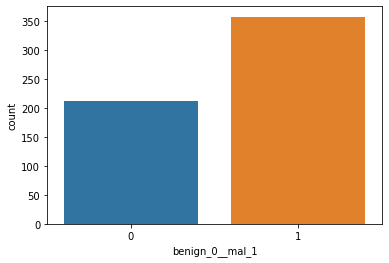

In [6]:
sns.countplot(x = "benign_0__mal_1", data = df)

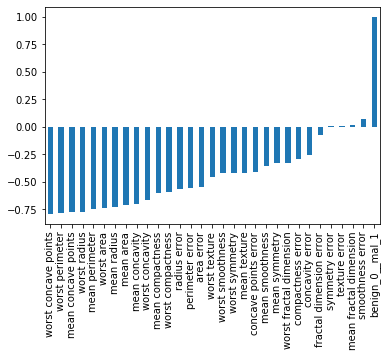

In [10]:
df.corr()["benign_0__mal_1"].sort_values().plot(kind = "bar")

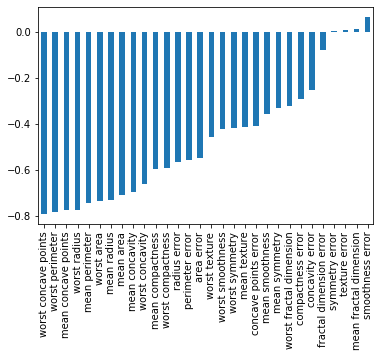

In [11]:
#drop the last label column
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind = "bar")

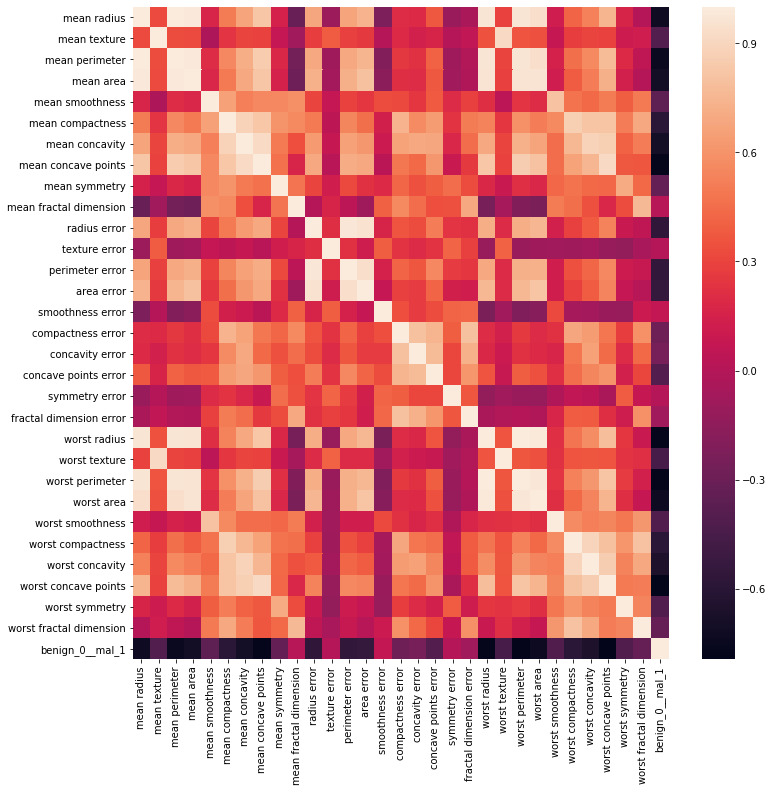

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [0]:
#Define featrues and label, and train test split
X = df.drop("benign_0__mal_1", axis = 1).values
y = df.benign_0__mal_1.values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 101)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [0]:
#create a model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [22]:
X_train.shape

(426, 30)

In [0]:
model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
#Binary Classification
model.add(Dense(1, activation="sigmoid"))
model.compile(loss = "binary_crossentropy",optimizer = "adam")

In [0]:
#train the model
model.fit(X_train,y_train, epochs=600, validation_data=(X_test, y_test))

In [0]:
losses = pd.DataFrame(model.history.history)

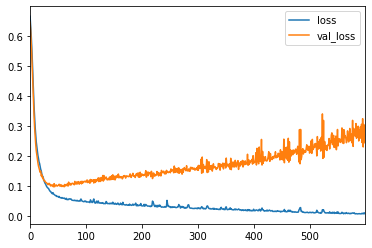

In [30]:
# the loss still goes down when val_loss is going up, which shows we are over fitting our training data
losses.plot()

In [0]:

model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
#Binary Classification
model.add(Dense(1, activation="sigmoid"))
model.compile(loss = "binary_crossentropy",optimizer = "adam")

In [0]:
#how to avoid over fitting
#Option 1: we use callback to stop once it is over fitting 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose= 1, patience = 25)

In [0]:
#train the model
model.fit(X_train,y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

In [0]:
model_loss = pd.DataFrame(model.history.history)

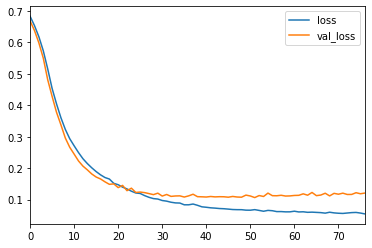

In [46]:
model_loss.plot()

In [0]:
#OPTION 2: Use dropout
from tensorflow.keras.layers import Dropout

In [0]:

model = Sequential()
model.add(Dense(30, activation="relu"))
#add a dropout after each model, with 50% random probability of turn off
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
#Binary Classification
model.add(Dense(1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer = "adam")

In [0]:
#train the model
model.fit(X_train,y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

In [0]:
model_loss = pd.DataFrame(model.history.history)

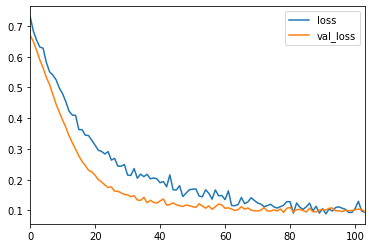

In [51]:
model_loss.plot()

In [0]:
#prediction
predictions = model.predict_classes(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [56]:
print(confusion_matrix(y_test, predictions))

[[53  2]
 [ 1 87]]
